## Résumé de la fiche de code

Modélisation d'un movement migratoire a l'aide de pays et d'individus (migrants) fictifs à l'aide des critères suivants:

##### Niveau de vie du pays (modélisé par un flottant variant entre 0 et 1, 1 est non inclu)
##### Situation politique du pays (modélisé par un flottant variant entre 0 et 1, 1 est non inclu)

Les critères sont les différents facteurs qui peuvent pousser à la migration.
Chaque individus a un poids/préférence pour chaque critère qui est modélisé par un flottant variant entre 0 et 1, 1 est non inclu.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random.seed(0)

In [36]:
# La fonction repartition_annuelle simule un mouvement migratoire sur 1 an des individus 
# de la liste individus vers les pays de la liste pays. Elle utilise la formule 
# " somme des (poids du critère i)*(note du critère i) pour 1 <= i <= n ", avec n 
# le nombre de critères utilisés.

def repartition_annuelle(pays, individus):
    for i in range(len(individus)):
        acc = 0.0
        p = individus[i][3]
        
        for j in range(len(pays)):
            n = individus[i][1]*pays[j][1] + individus[i][2]*pays[j][2]
            
            if n > acc and pays[j,3] > 0:
                acc = n
                p = j
                
        individus[i][3] = p
        pays[p,3] = pays[p,3] - 1

# La fonction changement effectue les changements possibles que peut subir un pays 
# d'une année a une autre.

def changement_pays(pays):
    for i in range(len(pays)):
        pays[i][3] = 20;
        f = random.random()
        if f > 0.5:
            pays[i][1] = random.random();
            pays[i][2] = random.random();
            
# La fonction changement effectue les changements possibles que peut subir un individu 
# d'une année a une autre.

def changement_individus(individus):
    for i in range(len(individus)):
        f = random.random()
        if f > 0.5:
            individus[i][1] = random.random();
            individus[i][2] = random.random();
            
def mise_a_jour_historique(pays):
    for i in range(len(pays)):
        pays[i][4].append([20 - pays[i][3], pays[i][1], pays[i][2]])

# La fonction migration simule un mouvement migratoire sur n années.

def migration(pays, individus, n):
    for i in range(n):
        plt.figure()
        repartition_annuelle(pays, individus)
        mise_a_jour_historique(pays)
        plt.hist(individus[:,3], bins = [i for i in range(len(pays)+1)])
        plt.show()
        changement_pays(pays)
        changement_individus(individus)

In [37]:
# Les individus (migrants) de caractéristiques: id, poids du critère 'niveau de vie', 
# poids du critère 'situation politique', pays choisi.

individus = np.array([np.array([i, random.random(), random.random(), -1]) for i in range(50)])
individus

array([[ 0.00000000e+00,  5.47757068e-01,  4.07448697e-01,
        -1.00000000e+00],
       [ 1.00000000e+00,  1.87281621e-02,  2.88213099e-01,
        -1.00000000e+00],
       [ 2.00000000e+00,  7.78700579e-01,  7.64243581e-01,
        -1.00000000e+00],
       [ 3.00000000e+00,  2.37246652e-01,  9.19339448e-01,
        -1.00000000e+00],
       [ 4.00000000e+00,  3.67581530e-01,  7.69623975e-01,
        -1.00000000e+00],
       [ 5.00000000e+00,  3.42353553e-01,  9.86308020e-01,
        -1.00000000e+00],
       [ 6.00000000e+00,  6.76212808e-01,  3.70956751e-01,
        -1.00000000e+00],
       [ 7.00000000e+00,  6.47145540e-02,  1.87723170e-01,
        -1.00000000e+00],
       [ 8.00000000e+00,  9.47139308e-01,  5.75157011e-01,
        -1.00000000e+00],
       [ 9.00000000e+00,  7.99815067e-01,  2.12800151e-01,
        -1.00000000e+00],
       [ 1.00000000e+01,  5.24369763e-01,  6.00288362e-01,
        -1.00000000e+00],
       [ 1.10000000e+01,  9.38990502e-01,  5.05580200e-01,
      

In [38]:
# Les pays de caractéristiques: id, note pour le critère 'niveau de vie', 
# note pour le critère 'situation politique', 'nombre de personne pouvant 
# etre accueillies par année', 'historique de valeurs'.

pays = np.array([np.array([i, random.random(), random.random(), 20, []]) for i in range(5)])
pays

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


array([[0, 0.13307110116046672, 0.25349884273493506, 20, list([])],
       [1, 0.9470997574592629, 0.5772401228688504, 20, list([])],
       [2, 0.5537276804412983, 0.7708637053172543, 20, list([])],
       [3, 0.9012872054264569, 0.39019187215413964, 20, list([])],
       [4, 0.8244986732440851, 0.8690824356126811, 20, list([])]],
      dtype=object)

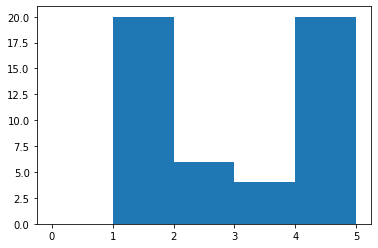

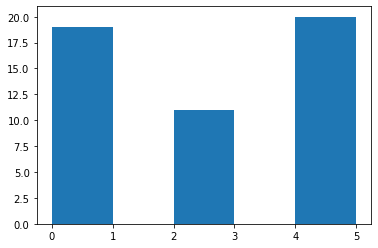

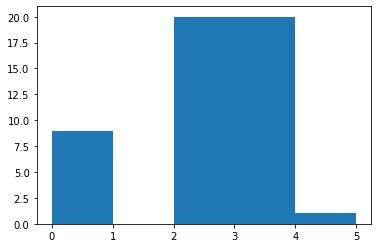

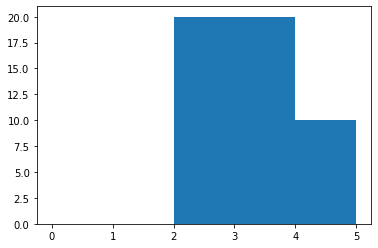

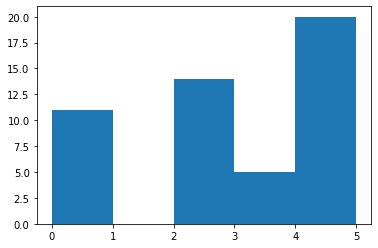

In [39]:
migration(pays, individus, 5)

In [40]:
pays

array([[0, 0.7346429888027365, 0.5591284328947075, 20,
        list([[0, 0.13307110116046672, 0.25349884273493506], [19, 0.4804034110991623, 0.8926365142625544], [9, 0.41865911867268657, 0.7872785867392197], [0, 0.2599166437993785, 0.20410532542388182], [11, 0.7346429888027365, 0.5591284328947075]])],
       [1, 0.4880315948348317, 0.07515898251331743, 20,
        list([[20, 0.9470997574592629, 0.5772401228688504], [0, 0.46961957672797827, 0.717908649144726], [0, 0.10174257168194911, 0.7532409698961434], [0, 0.4880315948348317, 0.07515898251331743], [0, 0.4880315948348317, 0.07515898251331743]])],
       [2, 0.26879524267588717, 0.40157833323186753, 20,
        list([[6, 0.5537276804412983, 0.7708637053172543], [11, 0.5537276804412983, 0.7708637053172543], [20, 0.5537276804412983, 0.7708637053172543], [20, 0.5537276804412983, 0.7708637053172543], [14, 0.5537276804412983, 0.7708637053172543]])],
       [3, 0.05937308310453049, 0.9571704989239962, 20,
        list([[4, 0.9012872054264569

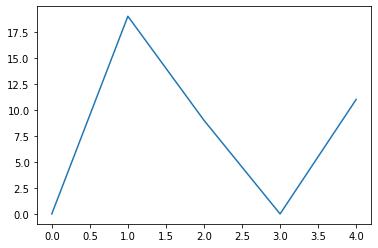

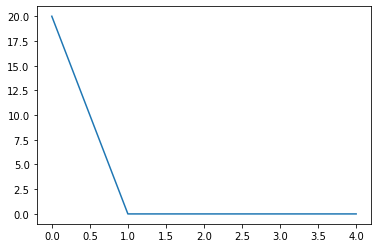

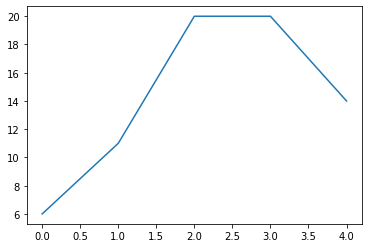

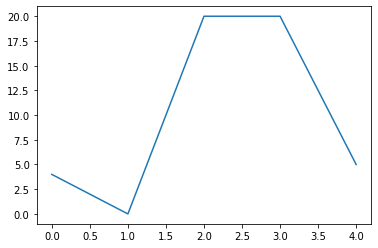

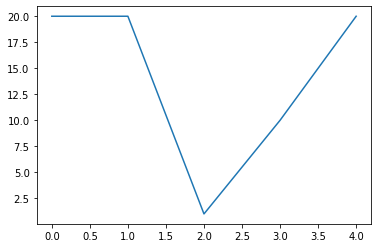

In [48]:

for j in range(len(pays)):
    plt.figure()
    plt.plot([i for i in range(5)], [pays[j][4][i][0] for i in range(len(pays[j][4]))], label = str(j))
    plt.show()
#plt.legend()
#plt.show()